<a href="https://colab.research.google.com/github/sydoky/heart_disease_classification_project/blob/main/HeartDiseaseProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Tools

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load the Data

In [5]:
df = pd.read_csv("/content/heart-disease.csv")

In [6]:
df.shape

(303, 14)

# Data Exploration (Exploratory Data Analysis or EDA)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

# Noramlized value_counts

In [9]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

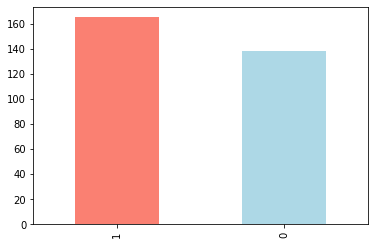

In [10]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according To Gender


In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


Making Our Crosstab Visual
# New Section

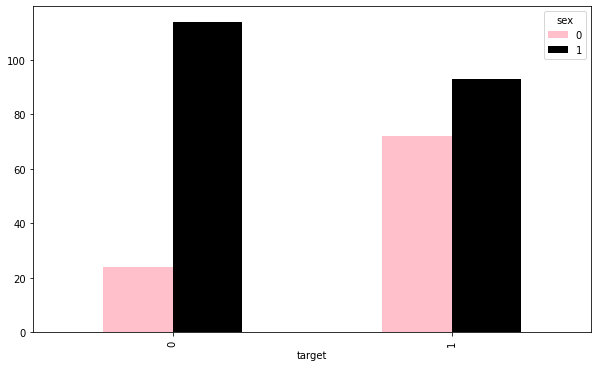

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink", "black"]);

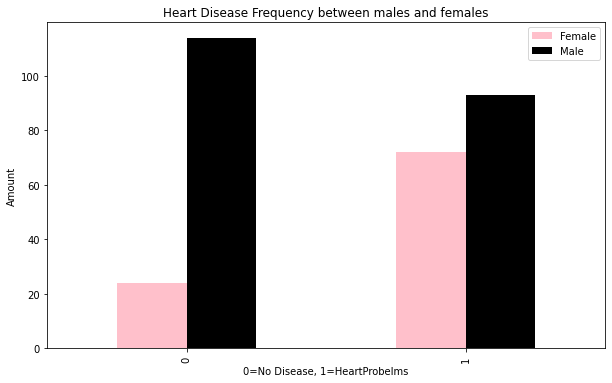

In [15]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["pink","black"]);

plt.title("Heart Disease Frequency between males and females")
plt.xlabel("0=No Disease, 1=HeartProbelms")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);


# Age vs Max rate For Heart Disease

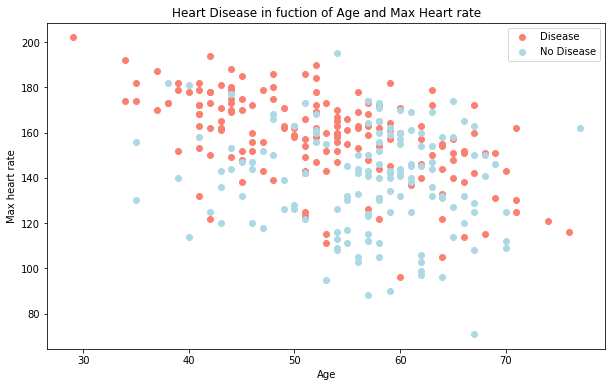

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color="salmon");


plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color="lightblue")

plt.title("Heart Disease in fuction of Age and Max Heart rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"]);



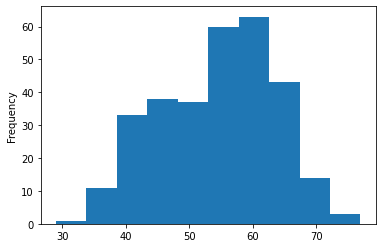

In [17]:
df.age.plot.hist();

In [18]:
#cp. Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic).
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
df.cp.value_counts() #check above cell

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


# Heart Disease Frequency per Chest Pain Type


In [20]:
pd.crosstab(df.cp,df.target) #ch stand for chest pain

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


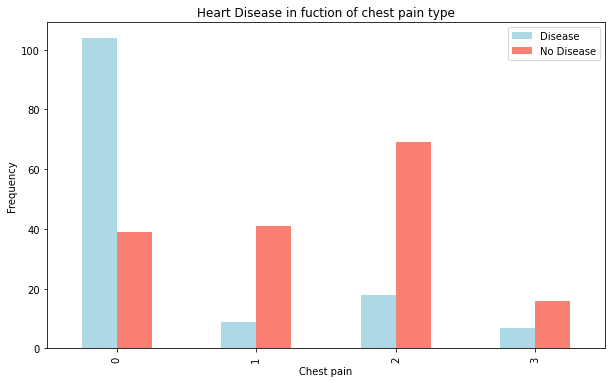

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["lightblue", "salmon"])

plt.title("Heart Disease in fuction of chest pain type")
plt.xlabel("Chest pain")
plt.ylabel("Frequency")
plt.legend(["Disease", "No Disease"]);


# Correlation between Independent Variables


In [22]:
corr_matrix=df.corr() #the close to 1 the more likely having a heart disease , 1.0 is a perfect coorelation 
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


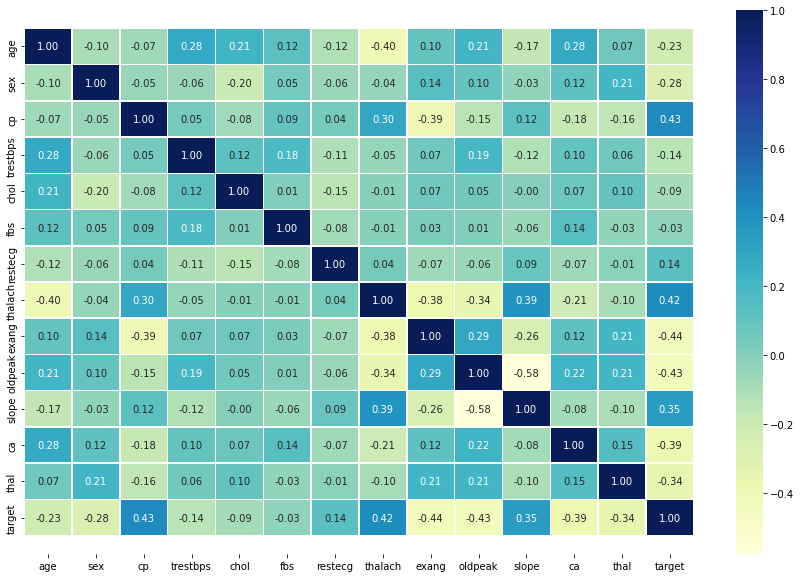

In [23]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True, #anoot is the box value -0.12, 0.21, -0.17 and so on
               linewidth=0.5,
               fmt=".2f", #fmt = format
               cmap="YlGnBu") #color map
bottom, top = ax.get_ylim() #get_ylim (y limits) is a line goes from down to up. Try to use get_xlim to see the difference 
ax.set_ylim(bottom + 0.5, top - 0.5);

# Modeling

In [24]:
X=df.drop("target", axis=1)
y=df["target"]

In [25]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [26]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [27]:
len(X), len(X_train)

(303, 242)

In [28]:
#we made a dictionary of models
models={"KNN":KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Linear SVC": LinearSVC()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores={} #we are going to add inside later on 

  for name, model in models.items(): #name is key word, model is a value from models
    model.fit(X_train, y_train)

    model_scores[name] = model.score(X_test, y_test)

  return model_scores

In [29]:
#here we are calling our function and provide arguments 
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'KNN': 0.6885245901639344,
 'Linear SVC': 0.47540983606557374,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

# Model Comaparison


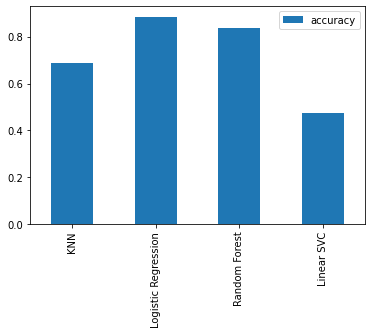

In [30]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter tuning and cross validation


# Tune K-NeighborsClassifier by hand


In [31]:
train_scores=[]

test_scores=[]

neighbors=range(1,21) #neighbors or 

knn=KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train, y_train)

  train_scores.append(knn.score(X_train,y_train))

  test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum KNN Score on the test data set75.40983606557377%


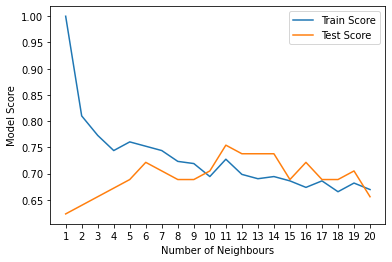

In [34]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()
print("maximum KNN Score on the test data set{}%".format(max(test_scores)*100))

# Tuning models with RandomizedSearchCv


In [35]:
#this dict for logistic regression
log_reg_grid={"C":np.logspace(-4, 4, 20), #np.logspace(-4, 4, 20) will provide values in cell 49
              "solver":["liblinear"]} #this parameter should be liblinear 

#this dict for randomforest classifier 
rf_grid={"n_estimators": np.arange(10, 1000, 50),
         "max_depth":[None, 3, 5, 10],
         "min_samples_split": np.arange(2, 20, 2),
         "min_samples_leaf": np.arange(1, 20, 2)}

In [36]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [37]:
np.random.seed(42)
rs_log_ref=RandomizedSearchCV(LogisticRegression(),
                              param_distributions = log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rs_log_ref.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [38]:
rs_log_ref.best_params_

#Without RandomizedSearchCV it will be difficult to find out the best C value 

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [39]:
rs_log_ref.score(X_test, y_test)

0.8852459016393442

In [40]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [41]:
rs_rf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 19,
 'min_samples_split': 4,
 'n_estimators': 210}

In [42]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [43]:
#We are not doing LinearSVC because it's not appropriate right now. We want to work on advance ones 

# Tuning A Model with GridSearchCv


In [44]:
log_red_grid = {"C":np.logspace(-4, 4, 20),
                "solver":["liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [45]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [46]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [50]:
# rf_grid={"n_estimators": np.arange(10, 1000, 50),
#          "max_depth":[None, 3, 5, 10],
#          "min_samples_split": np.arange(2, 20, 2),
#          "min_samples_leaf": np.arange(1, 20, 2)}
# np.random.seed(42)
# gs_rf=GridSearchCV(RandomForestClassifier(),
#                    param_grid=rf_grid,
#                    cv=5,
#                    verbose=True)
# gs_rf.fit(X_train,y_train)

In [49]:
# gs_rf.best_params_

# Evaluating a classification model,beyond Accuracy


In [47]:
#Make Predictions on our test data
y_preds=gs_log_reg.predict(X_test)

In [51]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [52]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

# ROC Curve and Auc Scores

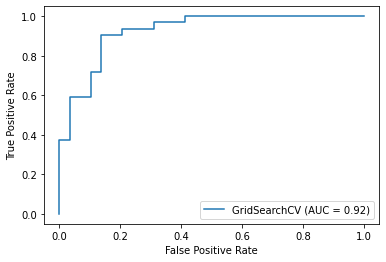

In [54]:
#Import ROC Curve function from metrics module 
plot_roc_curve(gs_log_reg, X_test, y_test);

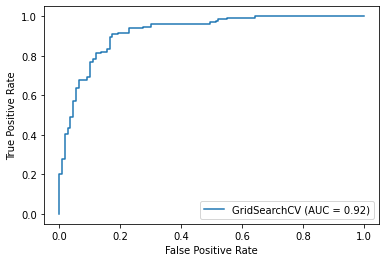

In [56]:
plot_roc_curve(gs_log_reg, X_train, y_train); #this one target

# Confusion Matrix

In [57]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


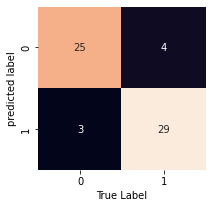

In [59]:
#Import Seaborn
import seaborn as sns

def plot_conf_mat(y_test, y_preds):
  fig, ax=plt.subplots(figsize=(3, 3))
  ax=sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
  
  plt.xlabel("True Label")
  plt.ylabel("predicted label")

plot_conf_mat(y_test, y_preds)

# Classification Report 

In [60]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [61]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [62]:
#Import Cross val Score
from sklearn.model_selection import cross_val_score
clf=LogisticRegression(C=0.23357214690901212, solver="liblinear")

In [63]:
#Cross validation score 
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")

In [64]:
cv_acc=np.mean(cv_acc)

In [65]:
cv_acc

0.8479781420765027

In [67]:
cv_precision=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="precision")

cv_precision=np.mean(cv_precision)

cv_precision

0.8215873015873015

In [68]:
cv_recall=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="recall")

cv_recall=np.mean(cv_recall)

cv_recall

0.9272727272727274

In [69]:
cv_f1=cross_val_score(clf,
                             X,
                             y,
                             cv=5,
                             scoring="f1")

cv_f1=np.mean(cv_f1)

cv_f1

0.8705403543192143

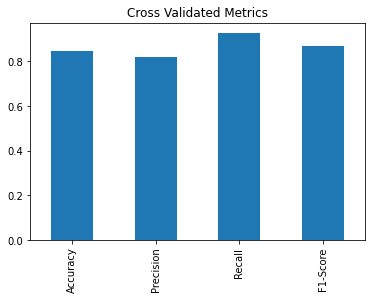

In [72]:
#Visualizing cross-validated metrics 

cv_metrics=pd.DataFrame({"Accuracy": cv_acc,
                         "Precision": cv_precision,
                         "Recall": cv_recall,
                         "F1-Score":cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross Validated Metrics", legend=False);

In [73]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


# Feature Importance

In [74]:
#finding features contributing most to the outcomes of the model

clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
#Check Coef of importance
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [78]:
features_dict=dict(zip(df.columns, list(clf.coef_[0]))) #we put 0 because we want to irritate from 0. Python zip() function accepts iterable items and merges them into a single tuple


features_dict

{'age': 0.003699220776580221,
 'ca': -0.6516534770577476,
 'chol': -0.0017036439067759743,
 'cp': 0.6747282587404362,
 'exang': -0.6312040612837573,
 'fbs': 0.047876881148997324,
 'oldpeak': -0.5759095045469952,
 'restecg': 0.3349019815885189,
 'sex': -0.9042409028785717,
 'slope': 0.4709514073081419,
 'thal': -0.6998420764664995,
 'thalach': 0.02472938284108309,
 'trestbps': -0.011613401339975146}

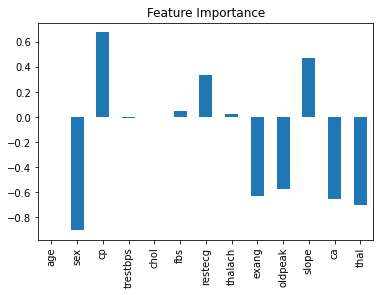

In [80]:
features_dict=pd.DataFrame(features_dict, index=[0])

features_dict.T.plot.bar(title="Feature Importance", legend=False);
#T stands for transporse 

# Crosstab of slope and target

In [83]:
pd.crosstab(df["target"],df["slope"]) #slope. Peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping). 
#0 = no heart disease, 1 = heart disease

slope,0,1,2
target,,,
0,12,91,35
1,9,49,107
